In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [4]:
# Load the data per book
book1_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book1.csv')
book2_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book2.csv')
book3_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book3.csv')
book4_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book4.csv')
book5_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book5.csv')

# Make sure that Source < Target in lexicographical order
book1_df[["Source","Target"]].values.sort()
book2_df[["Source","Target"]].values.sort()
book3_df[["Source","Target"]].values.sort()
book4_df[["Source","Target"]].values.sort()
book5_df[["Source","Target"]].values.sort()

book1_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


# Q1

## (a)

In [57]:
# Q1a - Construct an undirected graph book1 G by utilizing book1 df, treating it
#       as an edge list. In this dataframe, the “Source” and “Target” columns
#       contain character names, which should be utilized as node labels,
#       representing the characters (therefore, list(book1 G.nodes()) should
#       return a list of string character names). Each dataframe row denotes a
#       connection, with the “Source” and “Target” columns indicating the linked
#       characters, and the “Weight” column specifying the edge’s weight
#       attribute. Finally, output the total count of nodes and edges in
#       the book1 graph.

def make_graph(book_df: pd.DataFrame):
  """
  Make graph from single book_df
  Return: nx.Graph object
  """
  ## YOUR CODE STARTS HERE

  # creating a new graph
  G_book = nx.Graph()

  # iterating each row and adding each edge (and by default nodes) individually
  for row in book_df.index:
    G_book.add_edge(book_df.loc[row,"Source"], book_df.loc[row,'Target'],
                                        weight = book_df.loc[row,'weight'])
  return G_book

book1_G = make_graph(book1_df)

## Print number of nodes and egdes
## YOUR CODE STARTS HERE

print("Number of nodes:", book1_G.number_of_nodes())
print("Number of edges:", book1_G.number_of_edges())


Number of nodes: 187
Number of edges: 684


## (b)

In [17]:
# Q1b - For each of the five books, replicate the process described in (a) to
#       create graphs named book2 G, book3 G, book4 G, and book5 G. For each of
#       these graphs (5 of them), display the top-3 edges based on the highest
#       weight attribute.

# creating graphs for books 2,3,4,5
book2_G = make_graph(book2_df)
book3_G = make_graph(book3_df)
book4_G = make_graph(book4_df)
book5_G = make_graph(book5_df)

## YOUR CODE STARTS HERE

j = 1

# looping through each book (seperared by newline) and printing top 3 edges
# with most weight
for book_i in [book1_G, book2_G, book3_G, book4_G, book5_G]:
  print( "\n" + "book " + str(j) + "\n")
  j = i=j+1
  for i in range (3):
    print(sorted(book_i.edges(data=True),key= lambda x: x[2]['weight'],
                                                      reverse=True)[i])






book 1

('Eddard-Stark', 'Robert-Baratheon', {'weight': 291})
('Bran-Stark', 'Robb-Stark', {'weight': 112})
('Arya-Stark', 'Sansa-Stark', {'weight': 104})

book 2

('Tyrion-Lannister', 'Joffrey-Baratheon', {'weight': 92})
('Tyrion-Lannister', 'Cersei-Lannister', {'weight': 87})
('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 76})

book 3

('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 95})
('Jaime-Lannister', 'Brienne-of-Tarth', {'weight': 87})
('Jon-Snow', 'Mance-Rayder', {'weight': 83})

book 4

('Cersei-Lannister', 'Tommen-Baratheon', {'weight': 80})
('Cersei-Lannister', 'Margaery-Tyrell', {'weight': 67})
('Cersei-Lannister', 'Jaime-Lannister', {'weight': 49})

book 5

('Daenerys-Targaryen', 'Hizdahr-zo-Loraq', {'weight': 96})
('Theon-Greyjoy', 'Ramsay-Snow', {'weight': 87})
('Daenerys-Targaryen', 'Barristan-Selmy', {'weight': 75})


## (c)

In [53]:
# Q1c - Construct a single undirected graph, allbook G, which encompasses all
# the edges from the five books. In this graph, the weight attribute of each
# edge should be the cumulative total from all five books (consider the method
# for this, recalling from the lab that merely adding new nodes/edges may
# overlook existing ones). Identify and list the top-5 edges in allbook G
# based on their cumulative weight attribute.


allbook_G = nx.Graph()

allbook_df=pd.concat([book1_df,book2_df,book3_df,book4_df,book5_df])

## YOUR CODE STARTS HERE
## Hint, df.groupby().sum().reset_index()
## Note that the dataframes are pre-sorted, thus there's no duplicate pairs of ( Source=A,Target=B ) and ( Source=B,Target=A )

# getting the cumulative sum of all weights for each source-target edge
allbook_df_sum = allbook_df.groupby(['Source','Target'])['weight'].sum().reset_index()



#iterating each row and adding each edge (and by default nodes) individually
for row in allbook_df_sum.index:
 allbook_G.add_edge(allbook_df_sum.loc[row,"Source"],
                    allbook_df_sum.loc[row,'Target'],
                    weight = allbook_df_sum.loc[row,'weight'])


# list top 5 highest weight edges in new graph
highest_weights = sorted(allbook_G.edges(data=True),key= lambda x: x[2]['weight'],
                                                      reverse=True)[:5]
print(highest_weights)


[('Eddard-Stark', 'Robert-Baratheon', {'weight': 334}), ('Jon-Snow', 'Samwell-Tarly', {'weight': 228}), ('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 222}), ('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 219}), ('Cersei-Lannister', 'Tyrion-Lannister', {'weight': 209})]


# Q2

## (a)

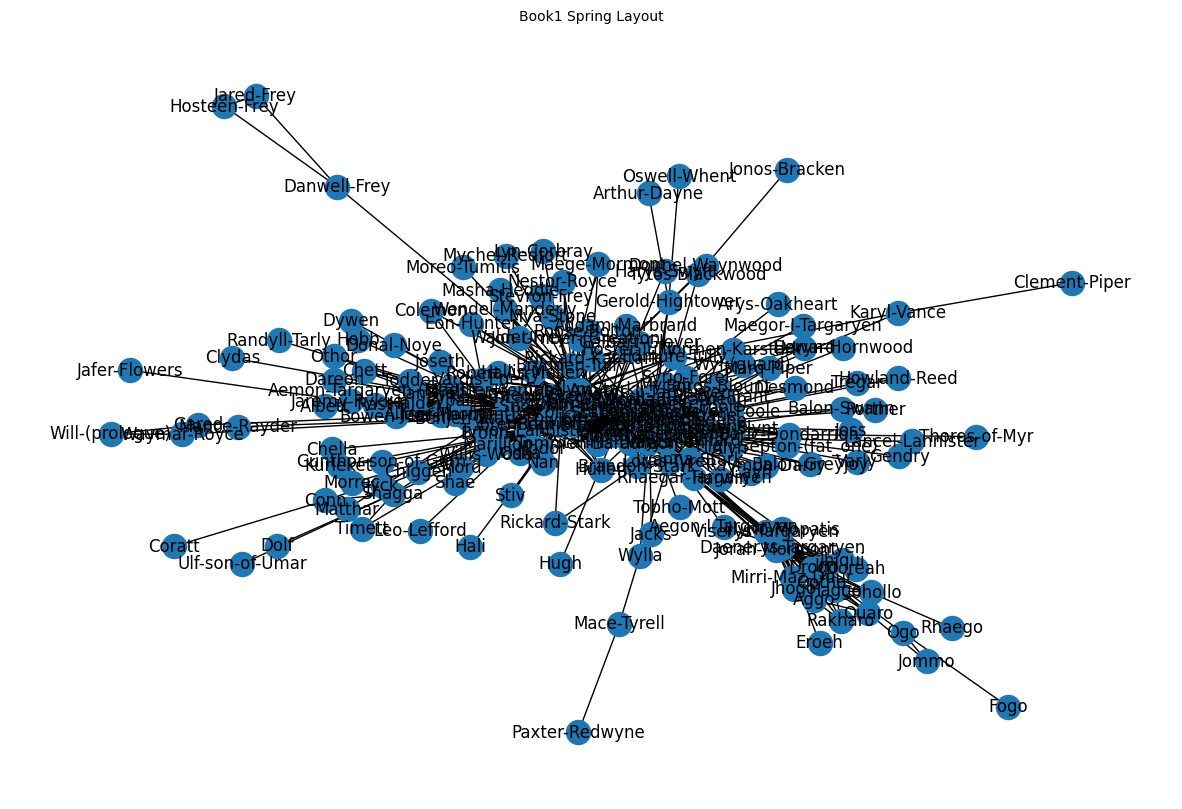

In [54]:
# Q1a - Create a visualization of book1 G using the spring layout. In this plot,
#       adjust the parameter in ‘nx.draw()’ to reveal node labels, keeping all
#       other settings like node size and font color at their defaults, except
#       ’ax=ax’ if needed.

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spring Layout", fontsize=10)

## YOUR CODE STARTS HERE

# drawing spring layout with labels
nx.draw_spring(book1_G, with_labels=True)
plt.show()

## (b)

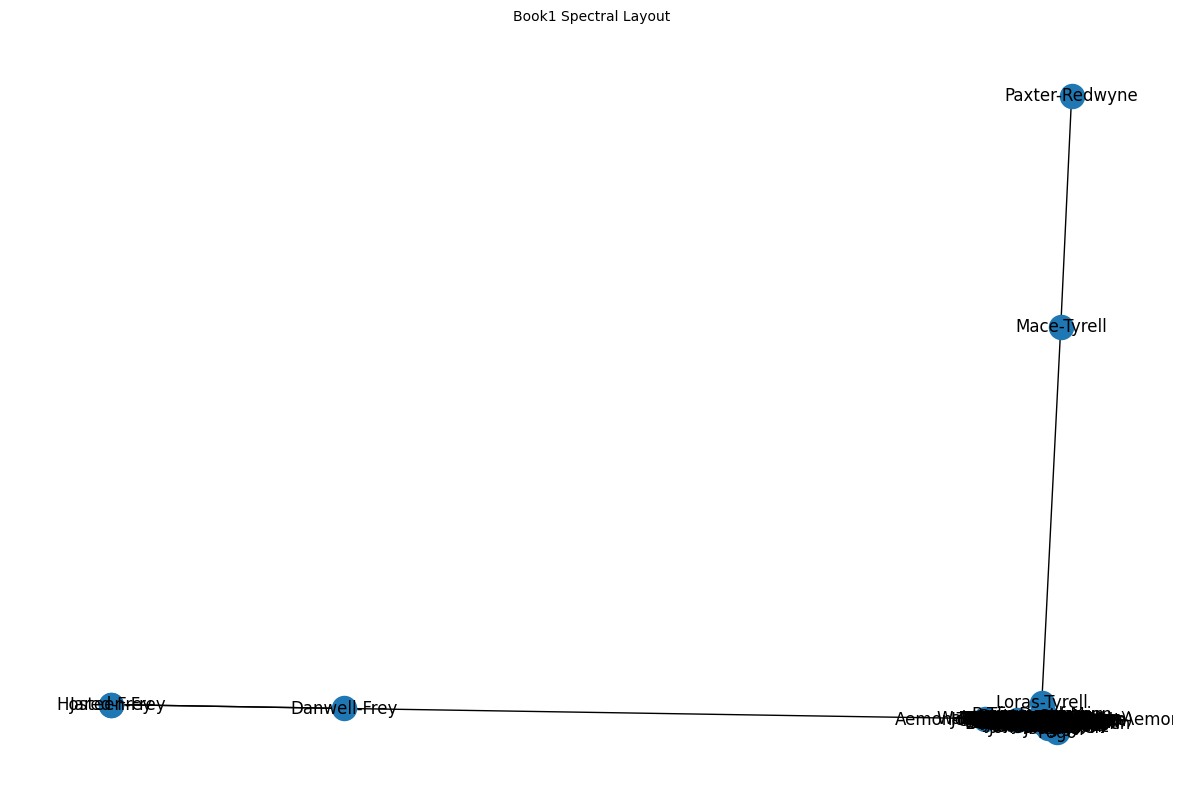

In [55]:
# Q2b - Create a visualization of book1 G using the other two layouts we
#       explored in the lab: spectral layout and circular layout. In this plot,
#       adjust the parameter in ‘nx.draw()’ to reveal node labels, keeping all
#       other settings like node size and font color at their defaults, except
#      ’ax=ax’if needed.


fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spectral Layout", fontsize=10)

## YOUR CODE STARTS HERE

# drawing spectral layout with labels
nx.draw_spectral(book1_G, with_labels=True)
plt.show()



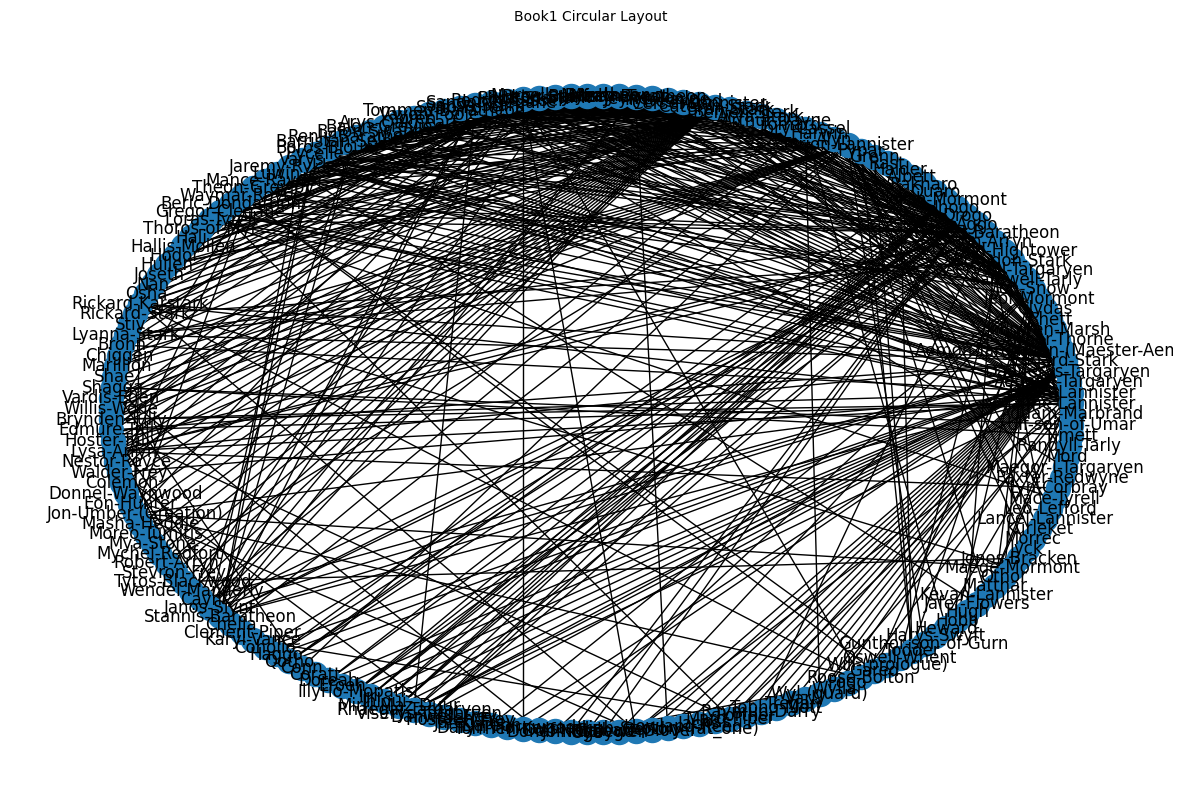

In [84]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Circular Layout", fontsize=10)

## YOUR CODE STARTS HERE

#drawing circular layout with labels
nx.draw_circular(book1_G, with_labels=True)
plt.show()


# Q3

## (a)

In [77]:
# Q3a - Determine the degree centrality for allbook G and list the top 15 nodes
#       with the highest centrality values. Assess whether these characters are
#       major or minor characters.

## YOUR CODE STARTS HERE

# getting degree centrality of all nodes in allbook and sorting them by highest
#                                                                       number
deg_centrality = nx.degree_centrality(allbook_G)
sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)[0:15]



[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118),
 ('Arya-Stark', 0.10566037735849056),
 ('Catelyn-Stark', 0.09433962264150943),
 ('Sansa-Stark', 0.09433962264150943),
 ('Robb-Stark', 0.0930817610062893),
 ('Eddard-Stark', 0.0930817610062893),
 ('Daenerys-Targaryen', 0.09182389937106918),
 ('Joffrey-Baratheon', 0.08679245283018867),
 ('Theon-Greyjoy', 0.0830188679245283),
 ('Robert-Baratheon', 0.08176100628930817),
 ('Bran-Stark', 0.06792452830188679)]

**Enter answer here:**

Most of the characters in the list are major characters (Tyrion, Jon, Jaime, Cersei) who impact much of the entire story but there are a few minor characters like Robb, Theon and Catelyn who contribute to certain arcs of the story (e.g. Robb and Catelyn were important characters in war of starks and lannisters and Theon was important when beseigeing Winterfell).



## (b)

In [62]:
#Q3b - Perform the same analysis as in (a) for PageRank, Closeness Centrality,
#      and Betweenness Centrality.

# PageRank
# getting page rank of all nodes in allbook and sorting them by highest page rank

## YOUR CODE STARTS HERE
prcentrality = nx.pagerank(allbook_G)
sorted(prcentrality.items(), key=lambda x:x[1], reverse=True)[0:15]


[('Jon-Snow', 0.0356937645004584),
 ('Tyrion-Lannister', 0.03284906001585236),
 ('Cersei-Lannister', 0.023607038592018494),
 ('Daenerys-Targaryen', 0.02230688198724802),
 ('Jaime-Lannister', 0.019753549619362144),
 ('Eddard-Stark', 0.018938219584721857),
 ('Arya-Stark', 0.018538944931775433),
 ('Stannis-Baratheon', 0.01805167123106783),
 ('Joffrey-Baratheon', 0.01742008392061762),
 ('Robb-Stark', 0.017344651104667343),
 ('Bran-Stark', 0.016699569168749175),
 ('Sansa-Stark', 0.016291183713306845),
 ('Robert-Baratheon', 0.015677734148541216),
 ('Catelyn-Stark', 0.015210743688076967),
 ('Theon-Greyjoy', 0.013877294725902392)]

In [63]:
# Closeness Centrality,

## YOUR CODE STARTS HERE

# getting closeness centrality of all nodes in allbook and sorting them by
#                                                                  highest
closenesscentrality = nx.closeness_centrality(allbook_G)
sorted(closenesscentrality.items(), key=lambda x:x[1], reverse=True)[0:15]


[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042),
 ('Jon-Snow', 0.44537815126050423),
 ('Stannis-Baratheon', 0.4446308724832215),
 ('Robb-Stark', 0.4441340782122905),
 ('Joffrey-Baratheon', 0.4339519650655022),
 ('Catelyn-Stark', 0.4334787350054526),
 ('Sansa-Stark', 0.43300653594771243),
 ('Arya-Stark', 0.43136190992946283),
 ('Theon-Greyjoy', 0.4233226837060703),
 ('Bran-Stark', 0.41886195995785036),
 ('Tywin-Lannister', 0.4112778065183652)]

In [64]:
# Betweenness Centrality

## YOUR CODE STARTS HERE

# getting betweeness centrality of all nodes in allbook and sorting them by
#                                                                        highest
betweenesscentrality = nx.betweenness_centrality(allbook_G)
sorted(betweenesscentrality.items(), key=lambda x:x[1], reverse=True)[0:15]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566),
 ('Jaime-Lannister', 0.10083800602581632),
 ('Cersei-Lannister', 0.08870426655860289),
 ('Arya-Stark', 0.08724236063571153),
 ('Eddard-Stark', 0.07873239257251873),
 ('Robert-Baratheon', 0.07822769060383258),
 ('Robb-Stark', 0.06646842683586629),
 ('Catelyn-Stark', 0.054973667953404186),
 ('Sansa-Stark', 0.04869098175180615),
 ('Barristan-Selmy', 0.045549578315223826),
 ('Bran-Stark', 0.04491117872765179)]

## (c)

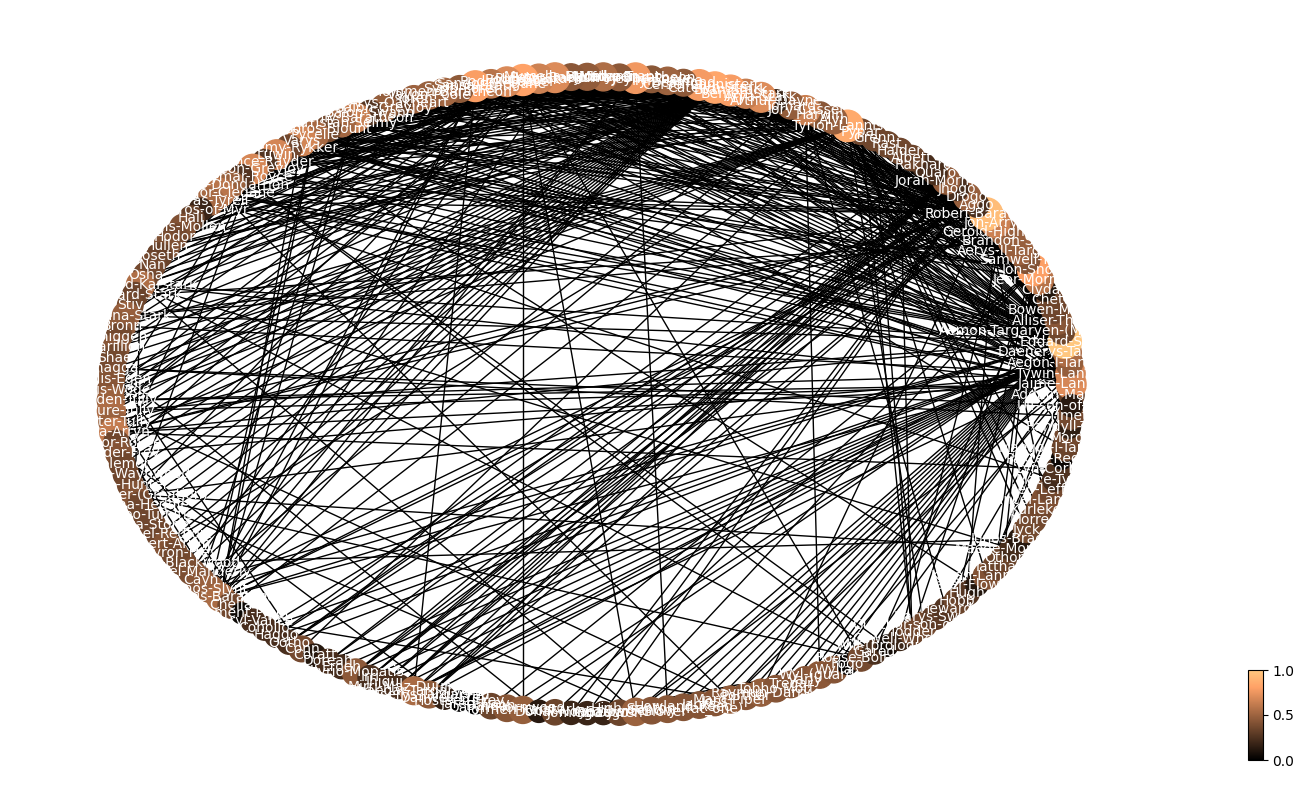

In [82]:
## YOUR CODE STARTS HERE
# Q3c -Apply the ‘draw centrality()’ function from Lab-7 to create a circular
#      layout visualization representing Closeness Centrality for book1 G. Set
#      the ‘node scale’ parameter to 1e3 (1e3= 103).

def draw_centrality(G: nx.Graph, centrality_measure: dict, node_scale: float):
    """
    G: the graph to draw
    centrality_measure: your centrality_measure returned from nx.centrality_measures
    node_scale: the scale of the node size
    """
    fig, ax = plt.subplots(figsize=(15, 10))

    # centrality, cast it to a np.array of floats
    centrality = np.fromiter(centrality_measure.values(), float)

    # plot
    # you choice of layout here, as we see from the Layouts session, spring layout might be the most suitable for this Graph
    # here we fixed the random seed, so the positions are consistent thru multiple runs
    pos = nx.circular_layout(G)
    # node_color=centrality and cmap=plt.cm.copper will map the centrality to a linear colorspace
    # you can learn to pick the colormap you like, or customize a colormap here https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps
    # node_size=centrality*node_scale will scale the node_size w.r.t. the centrality
    nx.draw(G, pos, ax=ax, node_color=centrality, node_size=centrality*node_scale, cmap=plt.cm.copper)
    # we also draw the node labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color="white")
    # Place a colorbar
    sub_ax = fig.add_axes([0.95, 0.13, 0.01, 0.09])
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.copper),sub_ax)
    plt.show()

closeness_centrality = nx.closeness_centrality(book1_G)
draw_centrality(book1_G, closeness_centrality, node_scale=1e3)


# Q4

## (a)

In [68]:
#Q4a - Employ betweenness centrality as a metric to identify the top-5 likely
#      PoV characters in each book.

for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    print(f"Book{book_num+1}")

    ## YOUR CODE STARTS HERE

    #getting betweeness centrality of all nodes per book and printing top 5
    # most central nodes per book
    betweeness_centrality = nx.betweenness_centrality(book_G)
    print(sorted(betweeness_centrality.items(), key=lambda x:x[1],
                                                reverse=True)[0:5])


Book1
[('Eddard-Stark', 0.2696038913836117), ('Robert-Baratheon', 0.21403028397371796), ('Tyrion-Lannister', 0.1902124972697492), ('Jon-Snow', 0.17158135899829566), ('Catelyn-Stark', 0.1513952715347627)]
Book2
[('Arya-Stark', 0.1881116846731781), ('Jon-Snow', 0.17443976935054054), ('Robb-Stark', 0.1649406213117506), ('Tyrion-Lannister', 0.15532375650368552), ('Robert-Baratheon', 0.15374366220396257)]
Book3
[('Jon-Snow', 0.2238286056882584), ('Robert-Baratheon', 0.1664354010358413), ('Robb-Stark', 0.16232085177685468), ('Tyrion-Lannister', 0.15409096601718392), ('Joffrey-Baratheon', 0.14189087122742164)]
Book4
[('Stannis-Baratheon', 0.2763060074924735), ('Cersei-Lannister', 0.2754801247893542), ('Jaime-Lannister', 0.24281879137413512), ('Balon-Greyjoy', 0.19059739280327515), ('Sansa-Stark', 0.1527539849794001)]
Book5
[('Stannis-Baratheon', 0.45283060689247934), ('Daenerys-Targaryen', 0.2959459062106149), ('Jon-Snow', 0.24484873673158666), ('Tyrion-Lannister', 0.20961613179551256), ('Rob

## (b)

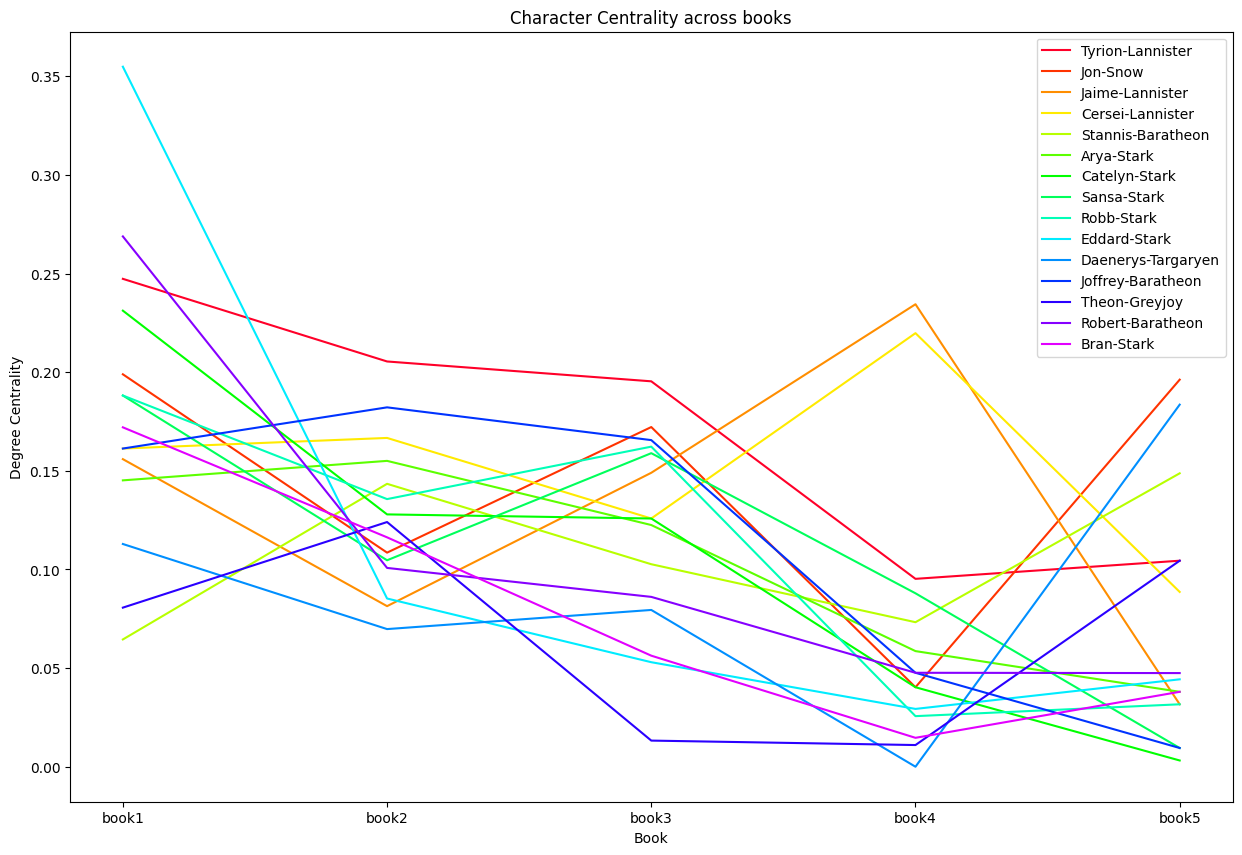

In [78]:
## YOUR CODE STARTS HERE

#Q4b - Utilizing the top-15 characters identified in question 3(a), create a
#      “time-series” graph showing the degree centrality of each character
#       across all five books, sequenced by book number. Assign a degree
#       centrality of 0 for characters not present in a particular book.
#       From this analysis,identify one character whose importance escalates up
#       to book 4, and another character whose significance diminishes
#       throughout the series.

# top-15 nodes' labels in a list
candidates = []
deg_centrality = nx.degree_centrality(allbook_G)
for character in sorted(deg_centrality.items(), key=lambda x:x[1],
                        reverse=True)[0:15]:

  candidates.append(character[0])

## YOU MAY USE THIS PART or IMPLEMENT YOUR OWN
deg_centrality_books = np.zeros((15,5))
for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    deg_centrality = nx.degree_centrality(book_G)
    for i,candidate in enumerate(candidates):
      if candidate in deg_centrality:
        deg_centrality_books[i][book_num]= deg_centrality[candidate]
  # if candidate is present in book, their degree should be assigned accordingly
      else:
        deg_centrality_books[i][book_num]= 0
  # else assign a degree of 0



fig, ax = plt.subplots(figsize=(15, 10))
books_axis = [f'book{i+1}' for i in range(5)]

# If use default cm the colors start to rotate after 8 categories
NUM_COLORS = 15
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i,candidate in enumerate(candidates):
    plt.plot(books_axis, deg_centrality_books[i], label=candidate)

plt.xlabel("Book")
plt.ylabel("Degree Centrality")
plt.legend()
plt.title('Character Centrality across books')
plt.show()


**Enter answer here:**
Jaime Lannister's importance increases from book 1 to book 4. While Eddard (Ned) Stark's importance diminshes throughout the series.
